In [1]:
import random
from tqdm import tqdm
import json
import os
from typing import *
from chatts.ts_generator import generate_controlled_attributes, generate_time_series, attribute_to_text
from chatts.encoding_utils import timeseries_encoding, timeseries_to_list
from chatts.attribute_utils import metric_to_controlled_attributes


# CONFIG
ENCODING_METHOD = 'sp'
SEQ_LEN = None  # Set to none for random seq_len
TOTAL_CNT = 1000
OUTPUT_DATASET = f'result/template_qa_{TOTAL_CNT}_{ENCODING_METHOD}.jsonl'
OUTPUT_LABEL = f'labels/template_qa_{TOTAL_CNT}_{ENCODING_METHOD}.json'

# All Config for TS Attributes (type & probability)
metric_config = json.load(open('config/metric_set.json', 'rt'))


In [8]:
current_seq_len = random.randint(64, 1024)
# sample = random.choice(list(metric_config))
sample = metric_config[8]
category = sample['category']
metric = random.choice(sample['metrics'])
print(current_seq_len, category, metric)

577 Traffic and Transportation Train Punctuality


In [12]:
metric_to_controlled_attributes(metric)

{'unit': 'minute',
 'seasonal': {'attributes': ['no periodic fluctuation'],
  'amplitude': {'min': 0.0, 'max': 0.0},
  'period': {'min': 0.0, 'max': 0.0}},
 'trend': {'attributes': ['decrease', 'increase', 'keep steady', 'multiple'],
  'start': {'min': 90.0, 'max': 100.0},
  'amplitude': {'min': 0.0, 'max': 5.0}},
 'noise': {'attributes': ['almost no noise']},
 'change': {'attributes': ['downward spike', 'decrease after upward spike'],
  'amplitude': {'min': 0.0, 'max': 10.0}}}

In [15]:
attribute_pool = generate_controlled_attributes(metric_to_controlled_attributes(metric))
# timeseries, attribute_pool = generate_time_series(attribute_pool, current_seq_len)

In [16]:
attribute_pool

{'seasonal': {'type': 'no periodic fluctuation', 'amplitude': 0.0},
 'trend': {'type': 'keep steady',
  'start': 97.20792905282714,
  'amplitude': 2.8921043907460833},
 'local': [{'type': 'downward spike',
   'position_start': None,
   'amplitude': 9.523040690961917},
  {'type': 'downward spike',
   'position_start': None,
   'amplitude': 5.622325898302264},
  {'type': 'downward spike',
   'position_start': None,
   'amplitude': 4.117755431806}],
 'frequency': {'type': 'no periodicity'},
 'noise': {'type': 'almost no noise'}}

In [17]:
timeseries, attribute_pool = generate_time_series(attribute_pool, current_seq_len)

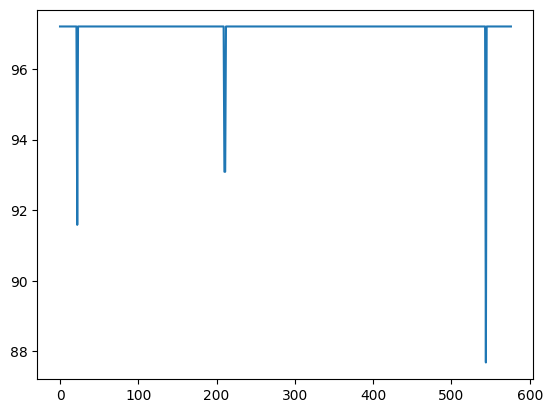

In [20]:
import matplotlib.pyplot as plt

plt.plot(timeseries)

In [21]:
scaled_timeseries, cur_ts_prompt, _ = timeseries_encoding(timeseries, ENCODING_METHOD)

In [24]:
cur_ts_prompt

'[Value Offset: -97.1674|Value Scaling: 3.1608]<ts><ts/>'